___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data


For this project we will take the data from a pickle file, a slightly cleaned version of data usually fetched from the Google Finance APIs.

But first we need to start with the proper imports.

### The Imports

In [1]:
import cufflinks as cf
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import init_notebook_mode
cf.go_offline()

sns.set_theme()
init_notebook_mode(connected=True)
%matplotlib inline

### The data


We'll get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

The data, in particular, will be from Jan 1st 2006 to Jan 1st 2016 for each of these banks. For each bank there will be a separate dataframe, with the variable name for that bank being its ticker symbol. In order to correctly retrieve this data, we create a list of the ticker symbols (as strings) in alphabetical order.

In [2]:
tickers = {0: 'BAC', 1: 'C', 2: 'GS', 3: 'JPM', 4: 'MS', 5: 'WFC'}

Then we use *pd.concat* to concatenate the bank dataframes together to a single data frame called **bank_stocks**.

In [3]:
bank_stocks = pd.read_pickle('data/all_banks')
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

Let's check the head of the dataframe to see brief view of the shape of the data we'll analyze:

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

## Exploratory Data Analysis (EDA)

### Kickstart


Let's explore the data a bit!

As a kickstart we see the max Close price for each bank's stock throughout the time period.

In [5]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Then we create a new empty DataFrame called **returns**. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Using this formula we'll create a new feature in our dataset, which will represet the return value for each bank.

In [6]:
returns = pd.DataFrame(index=bank_stocks.index, columns=list(
    map(lambda t: t + ' Return', list(tickers.values()))))
for t in list(tickers.values()):
  returns[t + ' Return'] = bank_stocks.xs('Close', axis=1, level='Stock Info')[t].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Let's now create pairplot using seaborn of the returns dataframe.

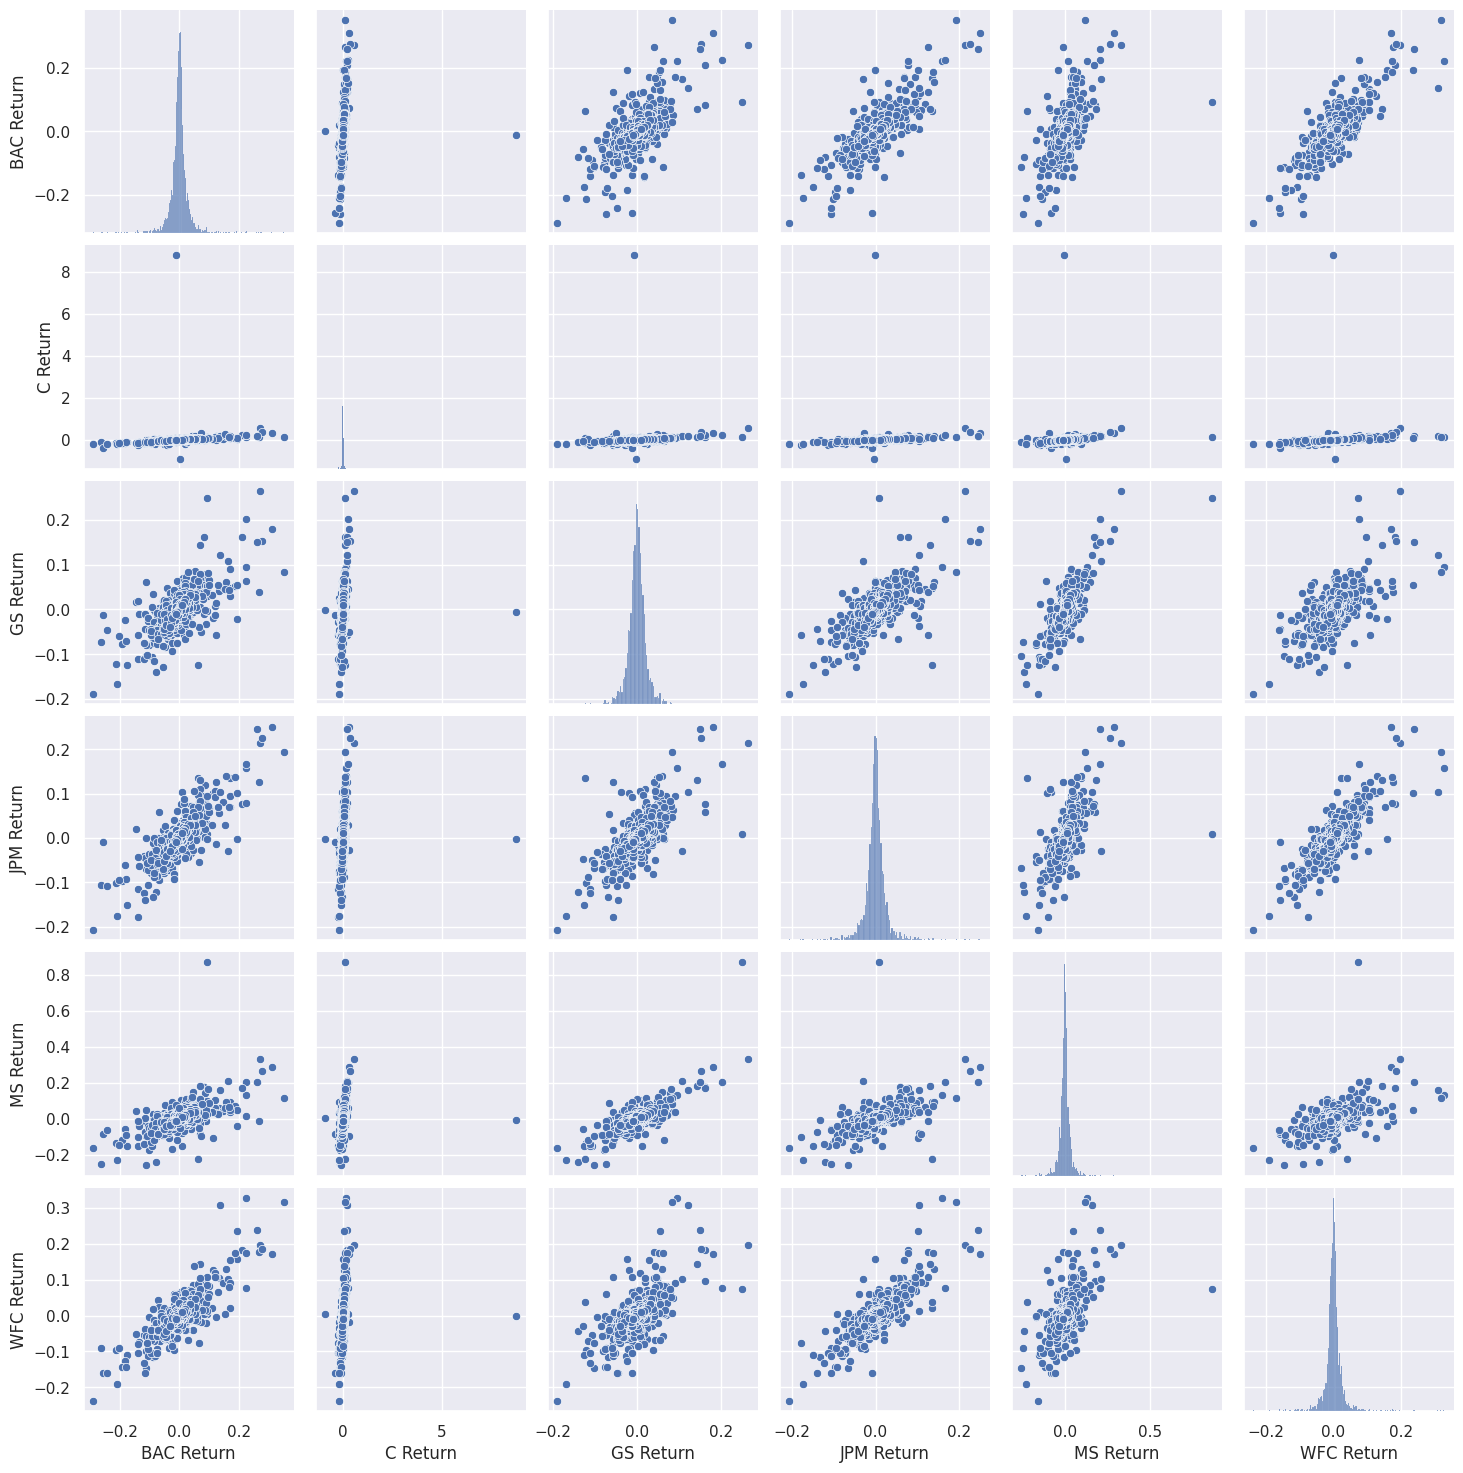

In [7]:
sns.pairplot(returns)

The stock that clearly grab attention is the Citygroup one, for the strange exponential behavior compared to the other banks. This is probably due to a crash.

We now try to figure out on what dates each bank stock had the best and worst single day returns.

In [29]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [9]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We can notice that 4 of the banks share the same day for the worst drop, on 2009-01-20. That was due to a really important event that day, that eas the election of Barack Obama as president of the USA. 

What we can also see is that Citigroup's largest drop and biggest gain were very close to one another. In that time frame happens an event that Internet talked a lot about, that was the reverse stock split in the period between the 6th january 2011 and the 9th january 2011.

Let's now take a look at the standard deviation of the returns:

In [10]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Due to the highest standard deviation, I classify the Citigroup as the riskiest stock.

But now we restrict our period to the year 2015:

In [11]:
returns[returns.index.year == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Considering only the 2015, the situation change. Even if It's for a small value, in that year Morgan Stanley become the riskiest stock.

Talikng about the Morgan Stanley and the risk in 2015, to better analyze the situation we'll plot a distplot of its returns. 

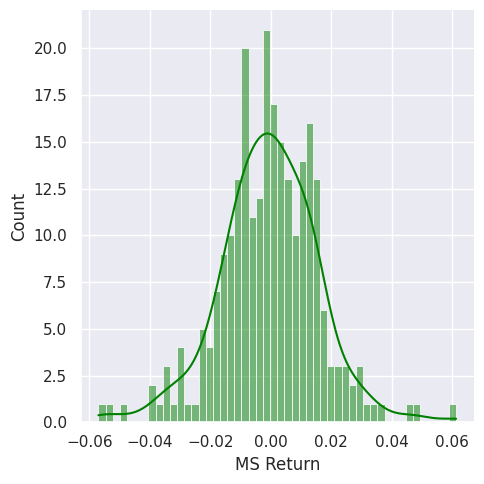

In [12]:
sns.displot(x=returns[returns.index.year == 2015]['MS Return'], bins=50, kde=True, color='green')


A strightforward normal distribution, with a standard deviation that tends to be high.

Let's make the same plot, but for the 2008 situation of Citigroup.

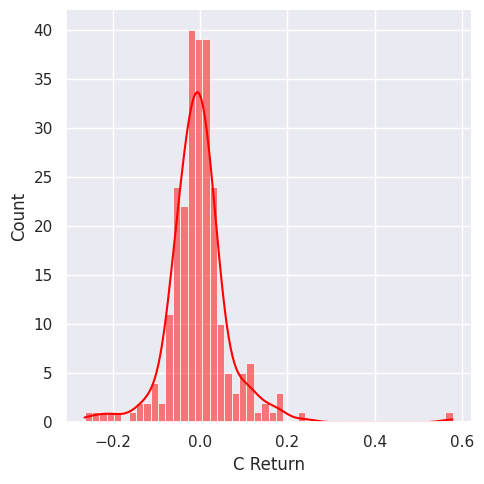

In [13]:
sns.displot(x=returns[returns.index.year == 2008]['C Return'], bins=50, kde=True, color='red')

Compared to the previous green displot(), this one has a much higher standard deviation, as we can see to the more stretched plot. The std is 2 times higher, more or less. And considering the 2008 year, this make absolutely sense.

### More Visualization

A lot of this project will focus on visualizations. We will wxplore other feature of the dataset using a wide range of libraries, from matplotlib to seaborn and even cufflinks.

But first, let's take the cross section with the Close stocks price for each bank.

In [14]:
close_bank_stocks = bank_stocks.xs('Close', axis=1, level='Stock Info')
close_bank_stocks.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


Then we can start plottin', starting from a general plot with all the banks.

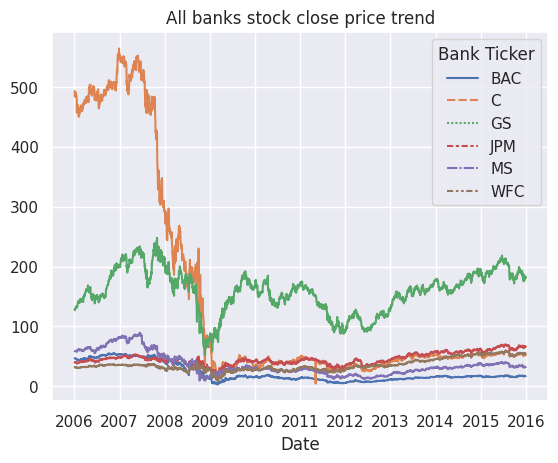

In [15]:
lp = sns.lineplot(data=close_bank_stocks)
lp.set_title('All banks stock close price trend')
for l in lp.lines: l.set_linestyle('-')

Plotly/interactive version:

In [16]:
close_bank_stocks.iplot()

Let's now generate a lineplot for each bank, separately.

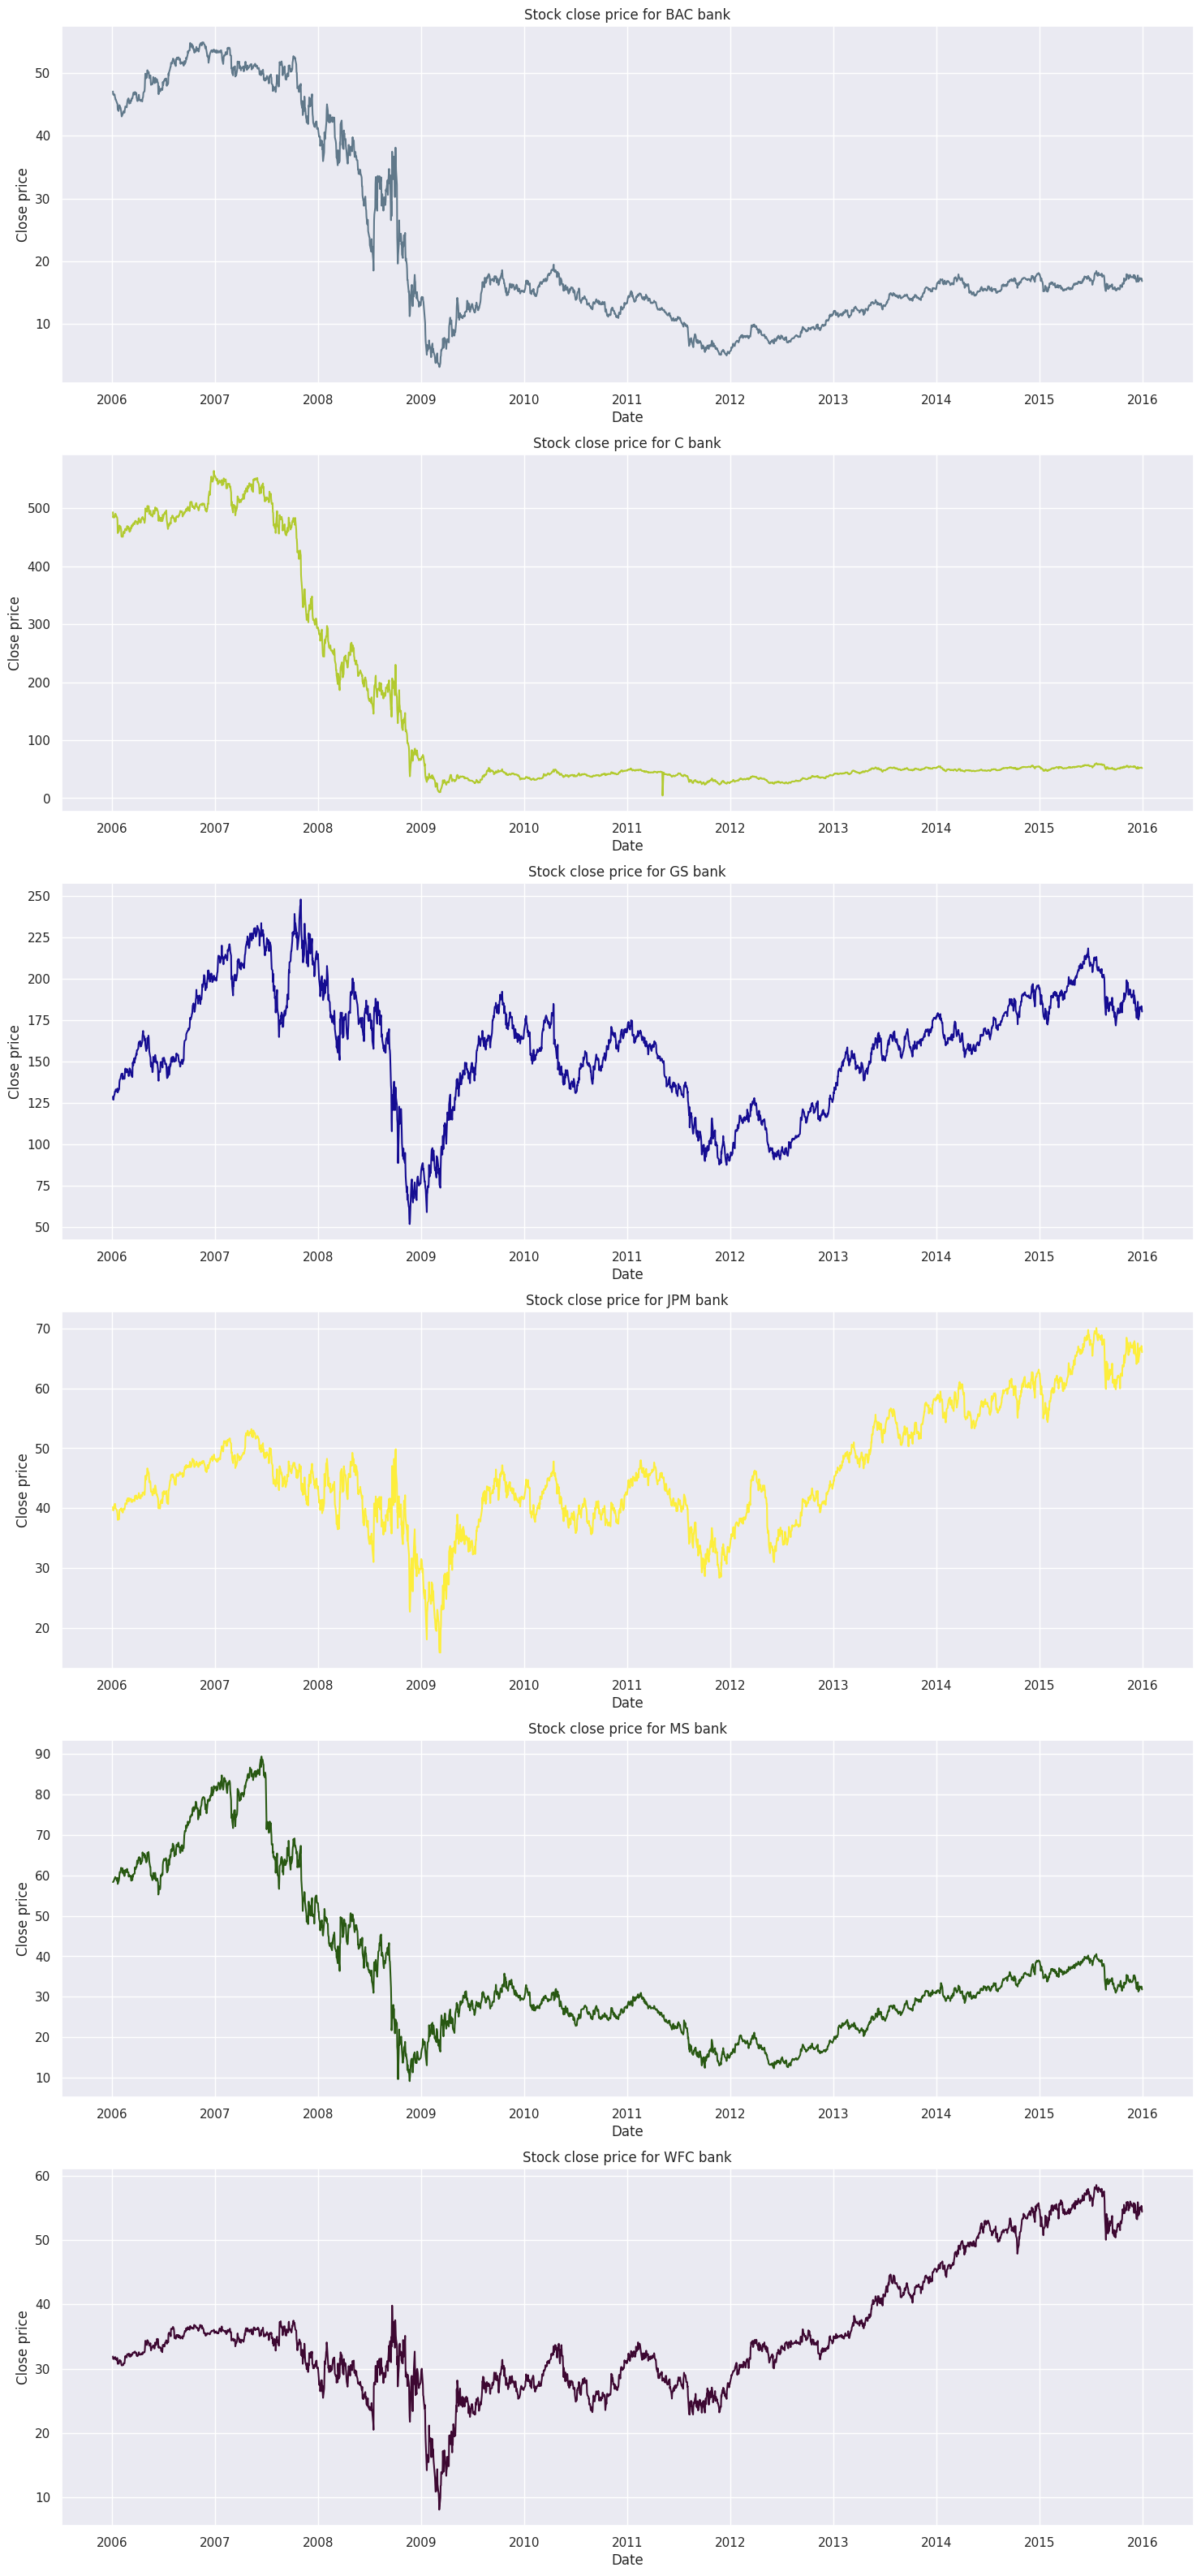

In [17]:
fig, ax = plt.subplots(len(close_bank_stocks.columns), 1, figsize=(18,40))

for k, v in tickers.items():
  color = (np.random.random(), np.random.random(), np.random.random())
  ax[k].plot(close_bank_stocks.index, close_bank_stocks[v], color=color)
  ax[k].set_title(f'Stock close price for {v} bank')
  ax[k].set_xlabel('Date')
  ax[k].set_ylabel('Close price')


### Moving Averages

Let's analyze a moving averages for these stocks in the year 2008. 

We plot the rolling 30 day average against the Close Price for Bank Of America's stock for the related year.

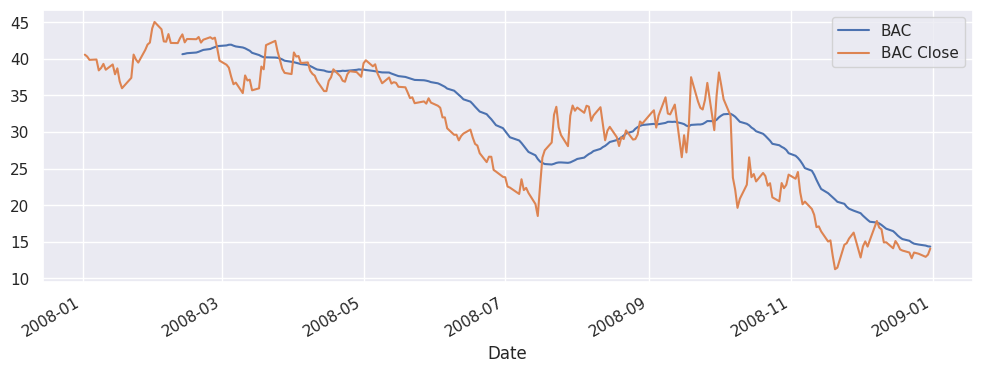

In [18]:
plt.figure(figsize=(12, 4))
close_bank_stocks[close_bank_stocks.index.year == 2008]['BAC'].rolling(30).mean().plot()
close_bank_stocks[close_bank_stocks.index.year == 2008]['BAC'].plot(label='BAC Close')
plt.legend() 

Now we shift our focus on how the every close price for bank are correlated. We'll compute the correlation table and visualize using both the seaborn and cufflinks version of heatmap.

In [19]:
corr_close_price = close_bank_stocks.corr()
corr_close_price.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

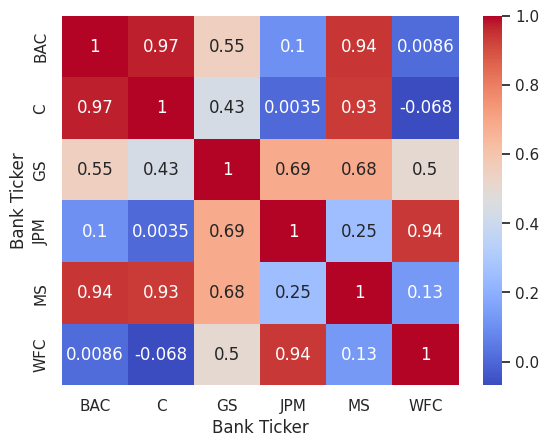

In [20]:
# seaborn version
sns.heatmap(data=corr_close_price, cmap='coolwarm', annot=True)

In [21]:
# cufflinks (interactive) version
corr_close_price.iplot(kind='heatmap', colorscale='oranges')

Finally, to better visualize the data above, we organize the correlations in a clustermap.

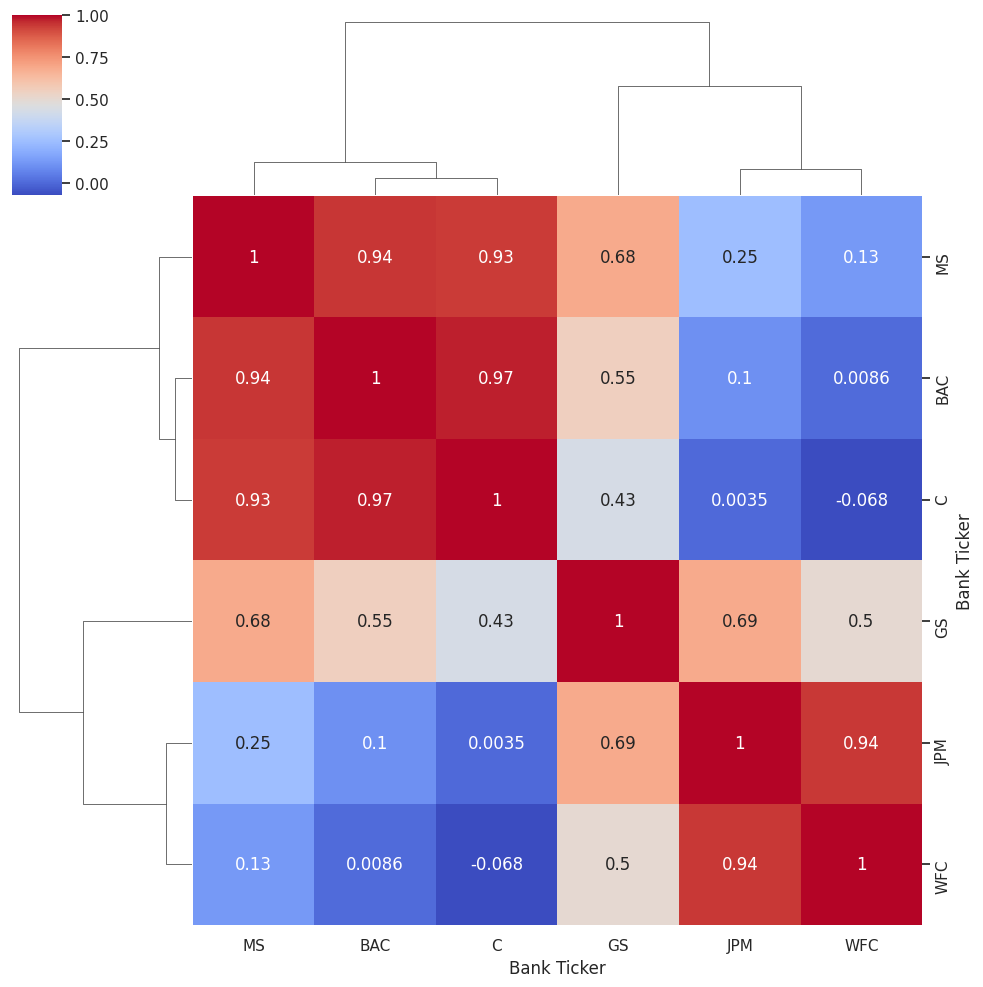

In [22]:
sns.clustermap(data=corr_close_price, cmap='coolwarm', annot=True)


### A cufflinks-focused part

In this final part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

What we'll use now is a *.iplot(kind='candle)* to create a [candle plot](https://en.wikipedia.org/wiki/Candlestick_chart) of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016, in an interactive version.

In [23]:
bank_stocks.xs('BAC', axis=1, level='Bank Ticker')['2015-01-01':'2016-01-01'].iplot(
  kind='candle', 
  title="Bank of America's stock trend"
)


We then pass to *.ta_plot(study='sma')* for a [Simple Moving Averages](https://en.wikipedia.org/wiki/Moving_average) plot of Morgan Stanley for the year 2015.

In [24]:
bank_stocks[bank_stocks.index.year == 2015].xs('MS', axis=1, level='Bank Ticker')['Close'].ta_plot(
    study='sma', title='Simple Moving Avareges for Morgan Stanley', periods=[12,21,55])
# [12, 21, 55] are periods ususally used ina typical financial analysis

To conclude, let's see *.ta_plot(study='boll')* to create a [Bollinger Band Plot](https://en.wikipedia.org/wiki/Bollinger_Bands) for Bank of America for the year 2015.

In [25]:
bank_stocks.xs('BAC', axis=1, level='Bank Ticker')[bank_stocks.index.year == 2015]['Close'].ta_plot(study='boll')